<a href="https://colab.research.google.com/github/michaeledge27/mathModeling/blob/main/projects/ShufflingUnderConstraints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [414]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [415]:
def initializeCards():
    clubs = ["club.2", "club.3", "club.4", "club.5", "club.6"]
    diamonds = ["diamond.2", "diamond.3", "diamond.4", "diamond.5", "diamond.6"]
    hearts = ["heart.2", "heart.3", "heart.4", "heart.5", "heart.6"]
    spades = ["spade.2", "spade.3", "spade.4"]
    return clubs, diamonds, hearts, spades

In [416]:
def draw_card(suit, player_list):
    """Draw a card from the specified suit and add it to the player's list."""
    if suit:  # Check if the suit is not empty
        card = suit.pop(random.randint(0, len(suit) -1))
        player_list.append(card)

In [417]:
clubs = ["club.2", "club.3", "club.4", "club.5", "club.6"]
diamonds = ["diamond.2", "diamond.3", "diamond.4", "diamond.5", "diamond.6"]
hearts = ["heart.2", "heart.3", "heart.4", "heart.5", "heart.6"]
spades = ["spade.2", "spade.3", "spade.4"]
west_cards = hearts + diamonds
north_cards = clubs + spades + diamonds
east_cards = clubs + hearts
all_cards = west_cards + north_cards + east_cards

In [418]:
club_spade_positions = [0, 3, 6, 9, 12, 15]      # No clubs or spades
heart_positions = [1, 4, 7, 10, 13]          # No hearts
diamond_spade_positions = [2, 5, 8, 11, 14, 17]  # No diamonds or spades

In [419]:
def build_valid_allocation(clubs, diamonds, hearts, spades):
    positions = [None] * 18  # 17 total positions

    for i in range(18):
        if i in club_spade_positions:
            available_cards = hearts + diamonds
        elif i in heart_positions:
            available_cards = diamonds + spades + clubs
        elif i in diamond_spade_positions:
            available_cards = clubs + hearts
        else:
            available_cards = clubs + diamonds + hearts + spades

        # Ensure we have available cards to choose from
        if available_cards:
            card = random.choice(available_cards)
            positions[i] = card

            # Remove the drawn card from the respective suit
            if card.startswith('club'):
                clubs.remove(card)
            elif card.startswith('diamond'):
                diamonds.remove(card)
            elif card.startswith('heart'):
                hearts.remove(card)
            elif card.startswith('spade'):
                spades.remove(card)

    return positions

In [420]:
# Function to check if an allocation is legal
def is_legal_allocation(positions):
    for i in club_spade_positions:
        if 'club' in positions[i] or 'spade' in positions[i]:
            return False
    for i in heart_positions:
        if 'heart' in positions[i]:
            return False
    for i in diamond_spade_positions:
        if 'diamond' in positions[i] or 'spade' in positions[i]:
            return False
    return True

In [421]:
def legal_allocation(all_cards):
    while True:
        random.shuffle(all_cards)
        if is_legal_allocation(all_cards):
            return all_cards[:]

In [422]:
def iterate_a_lot(iterations):
    # Initialize card count using the full set of cards
    clubs, diamonds, hearts, spades = initializeCards()
    all_cards = clubs + diamonds + hearts + spades
    card_count = {f"pos.{pos}": {card: 0 for card in all_cards} for pos in range(18)}

    for _ in range(iterations):
        # Reinitialize the cards for each iteration
        clubs, diamonds, hearts, spades = initializeCards()
        allocation = build_valid_allocation(clubs.copy(), diamonds.copy(), hearts.copy(), spades.copy())

        # Count occurrences of each card in each position
        for pos, card in enumerate(allocation):
            if card is not None:  # Check if the card is valid
                card_count[f"pos.{pos}"][card] += 1

    return card_count

In [423]:
iterations = 1000
card_count = iterate_a_lot(iterations)

In [424]:
df_distribution = pd.DataFrame(card_count).T.fillna(0)
df_proportions = df_distribution.div(iterations)

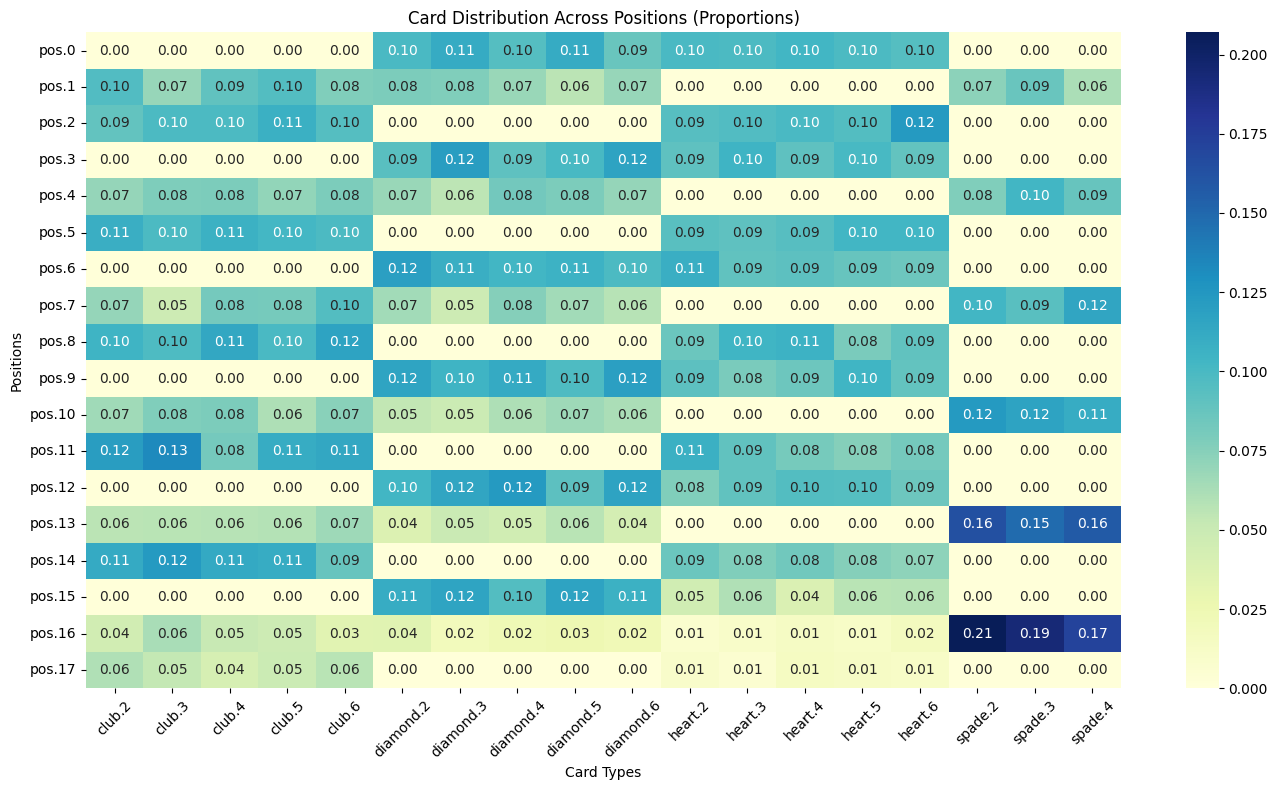

In [425]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_proportions, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Card Distribution Across Positions (Proportions)')
plt.xlabel('Card Types')
plt.ylabel('Positions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [426]:
def calculate_props(card_count, total_iterations):
    props = {card: {pos: (count / total_iterations) for pos, count in positions.items()}
                   for card, positions in card_count.items()}
    return props

In [427]:
def plot_card_distribution(card_count, total_iterations):
    # Convert card_count dictionary to a DataFrame for easy plotting
    data = {card: [count for pos, count in positions.items()] for card, positions in card_count.items()}
    df_distribution = pd.DataFrame(data)

    plt.figure(figsize=(12, 8))
    sns.heatmap(df_distribution.T, cmap='YlGnBu', annot=True, fmt=".1f")
    plt.title('Card Position Distribution Heatmap')
    plt.xlabel('Card Types')
    plt.ylabel('Positions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()